In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# Read data
A = pd.read_csv('./breast-cancer-wisconsin.data.txt', header=None)
columns =  ['id number', 'Clump Thickness', 'Uniformity of Cell Size', 
             'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
             'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign, 4 for malignant)']
A.columns = columns
A.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Filter out non-integer data
A = A[~(A == '?').any(axis=1)].astype(int).values

In [4]:
# Find indices of benign and malignant patients
benign = np.where(A[:, -1] == 2)[0]
malignant = np.where(A[:, -1] == 4)[0]

In [5]:
# Filter out id and diagnosis
Adata = A[:, 1:-1].T

In [6]:
# Compute SVD (PCA)
U, S, Vt = np.linalg.svd(Adata)

In [7]:
# Cluster for various values of k
# k represents the number of principal components to use (eigenvectors of the SVD)
C = {}

for k in (1, 2, 3):
    C[k] = U[:, :k].T @ Adata

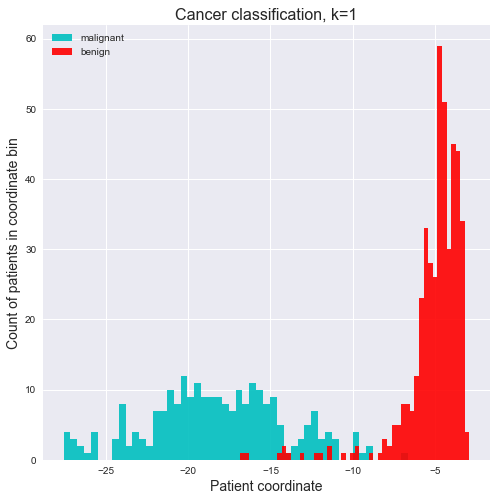

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

mhist = plt.hist(C[1].ravel()[malignant], bins=50, facecolor='c', alpha=0.9, label='malignant')
bhist = plt.hist(C[1].ravel()[benign], bins=50, facecolor='r', alpha=0.9, label='benign')
ax.set_title('Cancer classification, k=1', size=16)
ax.set_xlabel('Patient coordinate', size=14)
ax.set_ylabel('Count of patients in coordinate bin', size=14)
ax.legend(loc=2)
plt.grid('on')

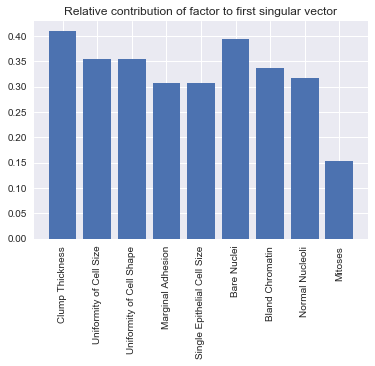

In [9]:
# Relative components of principal eigenvector
bar = plt.bar(np.arange(len(U)), np.abs(U[:, 0]), tick_label=columns[1:-1])
plt.title('Relative contribution of factor to first singular vector')
ticks = plt.xticks(rotation='vertical')

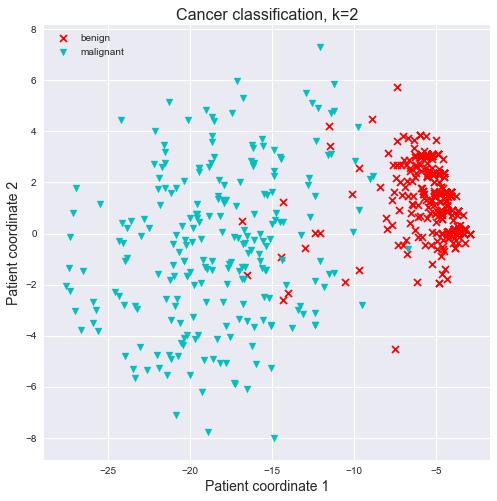

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(C[2][0][benign], C[2][1][benign], c='r', marker='x', label='benign')
plt.scatter(C[2][0][malignant], C[2][1][malignant], c='c', marker='v', label='malignant')

ax.set_title('Cancer classification, k=2', size=16)
ax.set_xlabel('Patient coordinate 1', size=14)
ax.set_ylabel('Patient coordinate 2', size=14)
ax.legend(loc=2)
plt.grid('on')

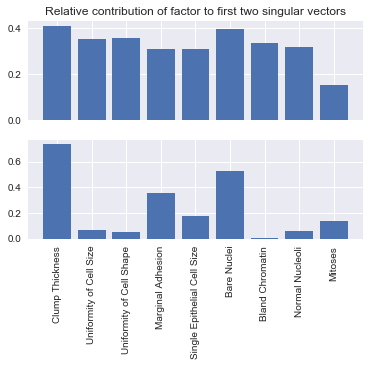

In [11]:
fig, ax = plt.subplots(2)
ax[0].set_title('Relative contribution of factor to first two singular vectors')

bar = ax[0].bar(np.arange(len(U)), np.abs(U[:, 0]), tick_label='')
bar = ax[1].bar(np.arange(len(U)), np.abs(U[:, 1]), tick_label=columns[1:-1])
ticks = plt.xticks(rotation='vertical')

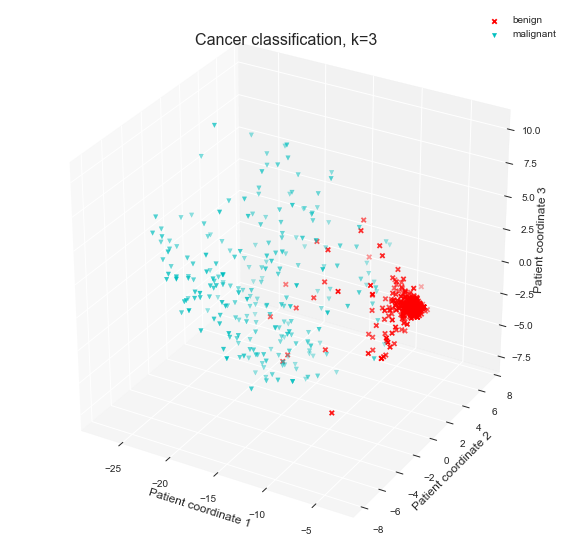

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')

ax.scatter(C[3][0][benign], C[3][1][benign], C[3][2][benign], c='r', marker='x', label='benign')
ax.scatter(C[3][0][malignant], C[3][1][malignant], C[3][2][malignant], c='c', marker='v', label='malignant')

plt.title('Cancer classification, k=3', size=16)
ax.set_xlabel('Patient coordinate 1', size=12)
ax.set_ylabel('Patient coordinate 2', size=12)
ax.set_zlabel('Patient coordinate 3', size=12)
ax.legend(loc=1)

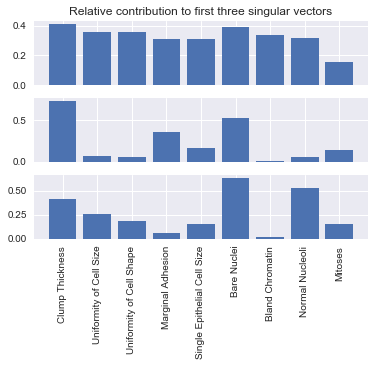

In [13]:
fig, ax = plt.subplots(3)
ax[0].set_title('Relative contribution to first three singular vectors')

bar = ax[0].bar(np.arange(len(U)), np.abs(U[:, 0]), tick_label='')
bar = ax[1].bar(np.arange(len(U)), np.abs(U[:, 1]), tick_label='')
bar = ax[2].bar(np.arange(len(U)), np.abs(U[:, 2]), tick_label=columns[1:-1])

ticks = plt.xticks(rotation='vertical')

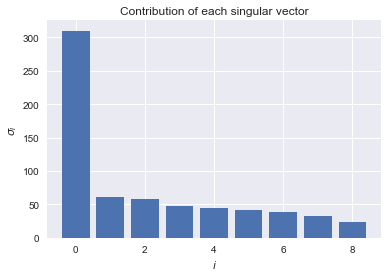

In [14]:
# Relative contribution of each singular vector

plt.bar(np.arange(len(S)), S)
plt.ylabel(r'$\sigma_i$')
plt.xlabel(r'$i$')
plt.title('Contribution of each singular vector')